# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [3]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']

keys = ['Height', 'Weight']
dfs = {'Male': male_df, 'Female': female_df}

for gender, df in dfs.items():
    for key in keys:
        print(f'{gender} {key} mean: {df[key].mean()}')
        print(f'{gender} {key} sd: {df[key].std()}')

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

<AxesSubplot:ylabel='Frequency'>

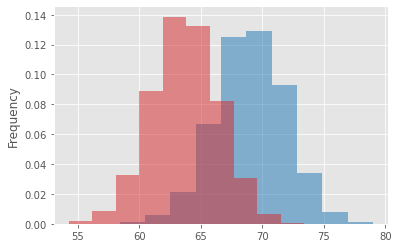

In [25]:
# Your code here
fig, ax = plt.subplots()

male_df['Height'].plot.hist(bins=10, density=True, color='tab:blue', alpha=0.5, ax=ax)
female_df['Height'].plot.hist(bins=10, density=True, color='tab:red', alpha=0.5, ax=ax)

In [18]:
# Record your observations - are these inline with your personal observations?
# Yes, they agree with what I expected. Where I live, men are usually taller than woman, and the histograms
# agree with the means shown in the previous step

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

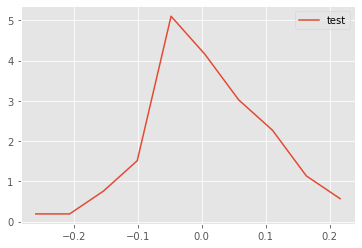

In [61]:
def density(x, nbins=10):
    n, bins = np.histogram(x, nbins, density=1)
    bins = bins[:-1] + ((bins[1] - bins[0]) / 2)

    return bins, n


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

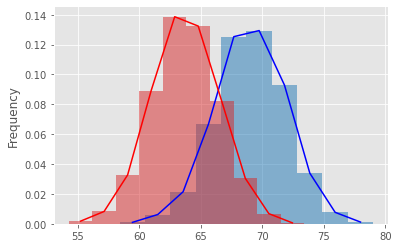

In [66]:
# You code here 
fig, ax = plt.subplots()

male_df['Height'].plot.hist(bins=10, density=True, color='tab:blue', alpha=0.5, ax=ax)
x, y = density(male_df['Height'])
ax.plot(x, y, label='Male Height Density', color='blue')

female_df['Height'].plot.hist(bins=10, density=True, color='tab:red', alpha=0.5, ax=ax)
x, y = density(female_df['Height'])
ax.plot(x, y, label='Female Height Density', color='red')

## Repeat above exerice for male and female weights

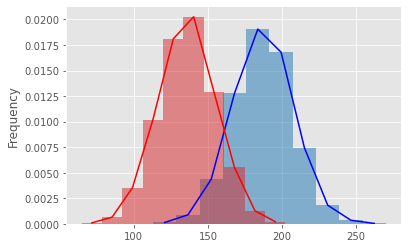

In [63]:
# Your code here 
fig, ax = plt.subplots()

male_df['Weight'].plot.hist(bins=10, density=True, color='tab:blue', alpha=0.5, ax=ax)
x, y = density(male_df['Weight'])
ax.plot(x, y, label='Male Weight Density', color='blue')

female_df['Weight'].plot.hist(bins=10, density=True, color='tab:red', alpha=0.5, ax=ax)
x, y = density(female_df['Weight'])
ax.plot(x, y, label='Female Weight Density', color='red')

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
# Yes. The density function generated with the histogram method of numpy matches the previously drawn histogram with
# the same number of bins. If we used a different number of bins, the curves wouldn't exactly match, but still share
# the same trends

# What is the takeaway when comparing male and female heights and weights?
# Men tend to be taller (by about 7 inches) and heavier (by about 50 lbs) than women on average, with both distributions
# having pretty similar spreads

## Repeat Above experiments in seaborn and compare with your results

<AxesSubplot:xlabel='Height', ylabel='Density'>

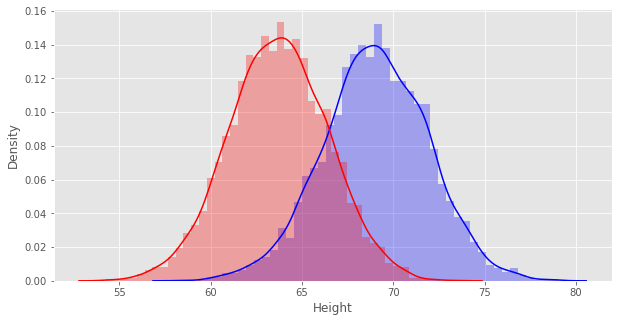

In [98]:
import seaborn as sns

# Code for heights here
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(male_df.Height,
             linewidth=0,
             alpha=0.3,
             color='b',
             label='Male Height',
             stat='density')

sns.kdeplot(male_df.Height,
             color='b',
             linewidth=1.5,
             label='Male Height Density')

sns.histplot(female_df.Height,
             linewidth=0,
             alpha=0.3,
             color='r',
             label='Female Height',
             stat='density')

sns.kdeplot(female_df.Height,
             color='r',
             linewidth=1.5,
             label='Female Height Density')

<AxesSubplot:xlabel='Weight', ylabel='Density'>

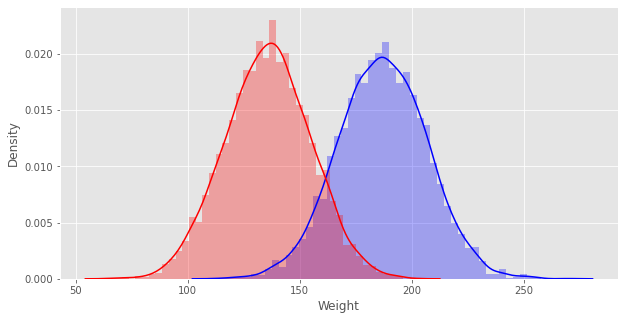

In [99]:
# Code for weights here
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(male_df.Weight,
             linewidth=0,
             alpha=0.3,
             color='b',
             label='Male Weight',
             stat='density')

sns.kdeplot(male_df.Weight,
             color='b',
             linewidth=1.5,
             label='Male Weight Density')

sns.histplot(female_df.Weight,
             linewidth=0,
             alpha=0.3,
             color='r',
             label='Female Weight',
             stat='density')

x, y = density(female_df.Weight, nbins=20)
sns.kdeplot(female_df.Weight,
             color='r',
             linewidth=1.5,
             label='Female Weight Density')

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# Yes, they follow the same trend. However, seaborn alternatives are smoother, evidently as the histogram and the KDE plot use
# a greater amount of bins. The KDE plot also doesn't seem to have sharp edges, also as a result of its process which always results in a
# smooth curve

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.